In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

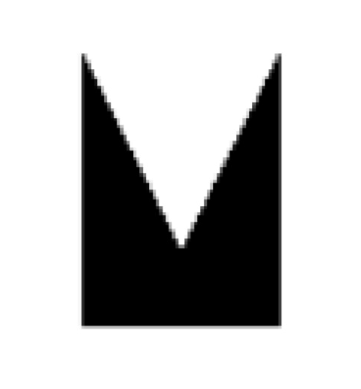

In [2]:
img = cv2.imread('./assets/ex3.jpg', cv2.IMREAD_GRAYSCALE) / 255

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [18]:
def invert_colors(img):
    # Esto se hace dado que al funcion morfologica aplica sobre blancos
    return (img <= 0.5).astype(np.uint8)

In [3]:
def get_circular_kernel(radius):
    """Generate a circular binary kernel with the specified radius."""
    size = 2 * radius + 1
    Y, X = np.ogrid[:size, :size]
    dist_from_center = np.sqrt((X - radius)**2 + (Y - radius)**2)
    return (dist_from_center <= radius).astype(np.uint8)

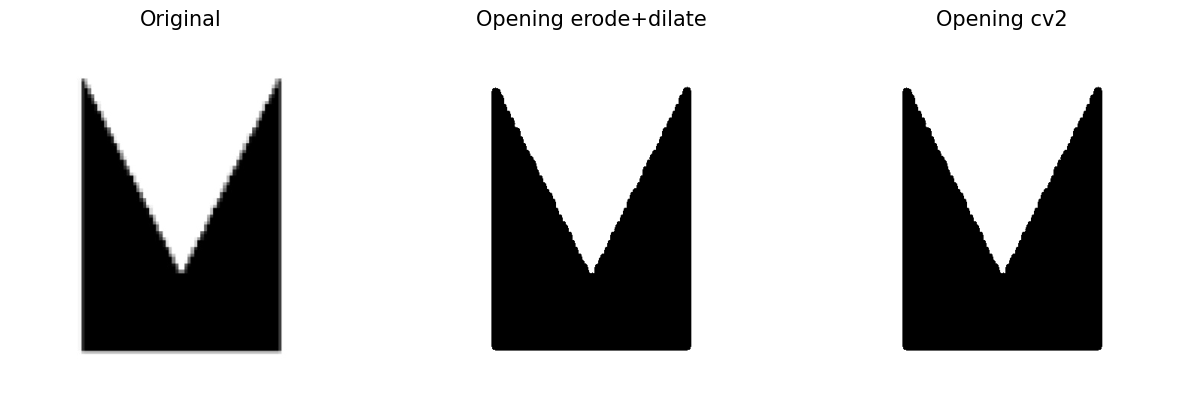

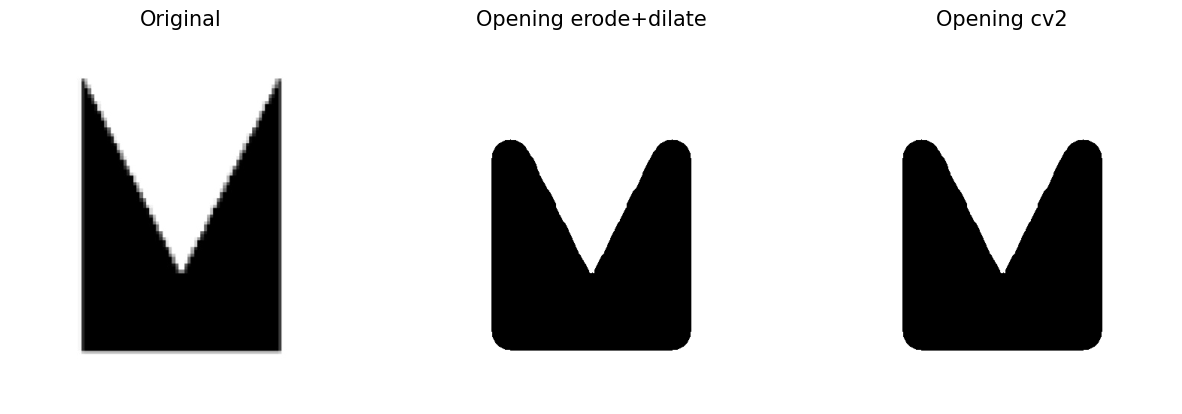

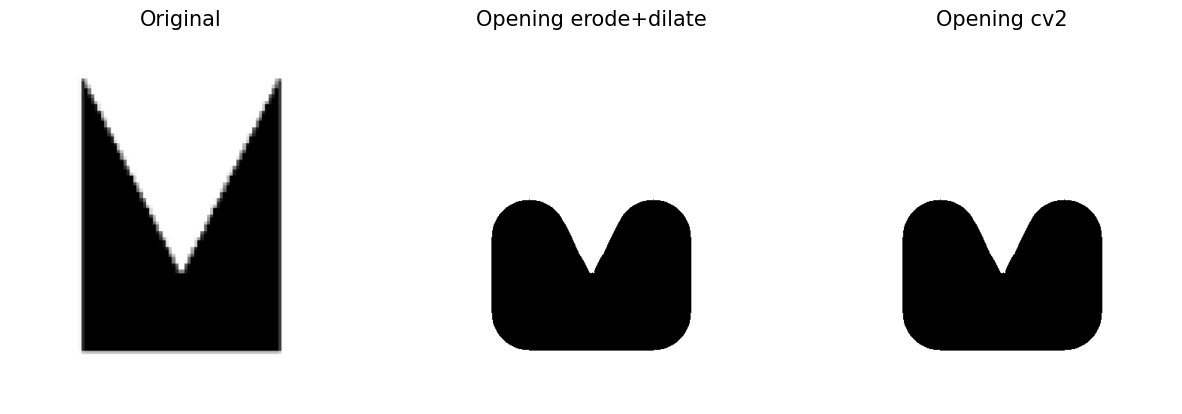

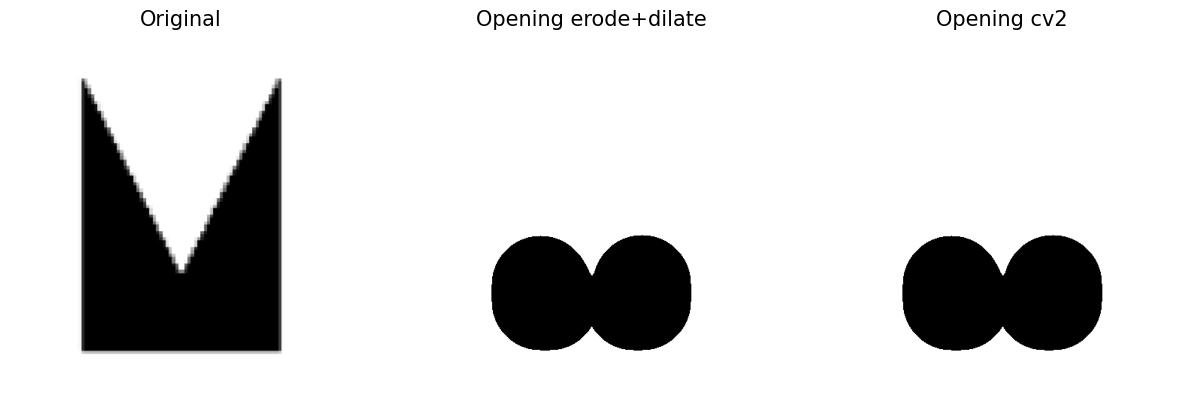

In [17]:
radius = [5, 25, 50, 65]
for r in radius:
    img_neg = invert_colors(img)
    kernel = get_circular_kernel(r)

    eroded = cv2.erode(img_neg,kernel,iterations = 1) 
    opening = invert_colors(cv2.dilate(eroded,kernel,iterations = 1))
    
    opening_cv = invert_colors(cv2.morphologyEx(img_neg, cv2.MORPH_OPEN, kernel))

    # Plots
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    
    ax00 = ax[0]
    ax01 = ax[1]
    ax02 = ax[2]

    ax00.set_title('Original', fontsize=15)
    ax00.axis('off')
    ax00.imshow(img, cmap='gray')

    
    ax01.set_title('Opening erode+dilate', fontsize=15)
    ax01.axis('off')
    ax01.imshow(opening, cmap='gray')

    ax02.set_title('Opening cv2', fontsize=15)
    ax02.axis('off')
    ax02.imshow(opening_cv, cmap='gray')
    plt.show()
